In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background
# quell warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
# Top 5 zipcodes for calls
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
# Top 5 Townships
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
# Unique title codes
df['title'].nunique()

110

**What Department Services are most frequently called?**

In [10]:
# Adding a feature called "service" from the 'title' field to indicate if Fire, EMS, or Police were involved
df['title'].head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [11]:
# add a column called 'service' with the first token on the left side of the colon in title
df['service'] = df['title'].apply(lambda title: title.split(':')[0])
# changeup 'Traffic' to indicate police services
df['service'] = np.where(df.title.str.contains('Traffic'),'Police',df.service)

In [12]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,service
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


EMS Services are the most frequently called, then Police, then Fire

In [13]:
df['service'].value_counts()

EMS       48877
Police    35695
Fire      14920
Name: service, dtype: int64

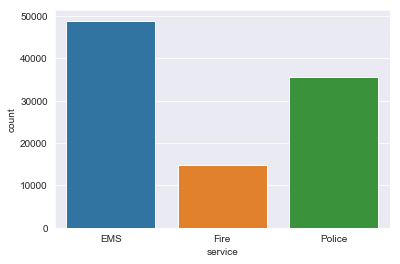

In [14]:
# plot the services use
sns.countplot('service',data=df)

**Doing time analysis**

In [15]:
# What dtype is timestamp?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
service      99492 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [16]:
type(df.timeStamp[0])

str

In [18]:
time = pd.to_datetime(df['timeStamp'][0])

In [19]:
# Convert the timeStamp entries to be
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Date'] = df['timeStamp'].apply(lambda time: time.date())
#df['Date'] = pd.to_datetime(df['timeStamp'])

In [20]:
# Now create features for Hour of Day, Month of Year and Day of Week to simplify Analysis
df['Hour'] = df['timeStamp'].apply(lambda t: t.hour)
df['Month'] = df['timeStamp'].apply(lambda t: t.month)
df['Day of Week'] = df['timeStamp'].apply(lambda t: t.dayofweek)

In [21]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,service,Date,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17,12,3


In [22]:
# Make the Day Of Week more readable with DayNames
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(days)

No Calls on Tuesdays. Also the weekends are weirdly quiet.

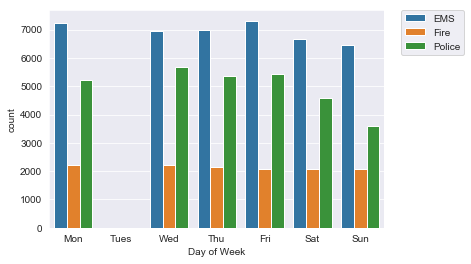

In [23]:
# Now show Emergency calls by Service and Day of Week
sns.countplot(x=df['Day of Week'],hue=df['service'], order=['Mon','Tues','Wed','Thu','Fri','Sat','Sun'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # move legend outside plot

Looking at months

In [24]:
byMonth = df.groupby('Month').count()
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,service,Date,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


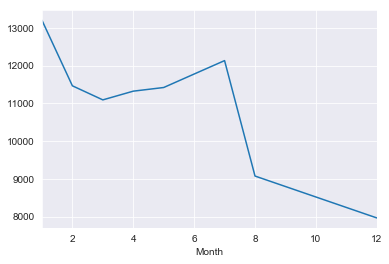

In [25]:
# use this to draw a line for the calls per township. This fills in the missing data in the viz
byMonth['twp'].plot()

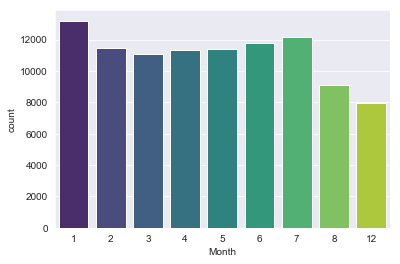

In [26]:
sns.countplot(x='Month',data=df,palette='viridis')

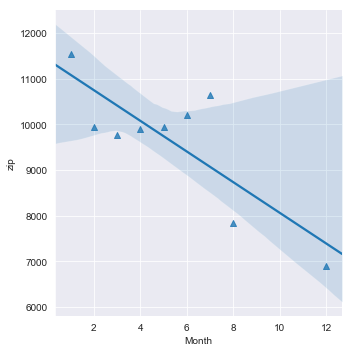

In [27]:
# showing calls in zipcode by Month with linear regression. Reset the index on byMonth for the plot
# Notice on the right how the Error shade grows when the line moves past December
sns.lmplot(x='Month',y='zip',data=byMonth.reset_index(), markers=['^'])

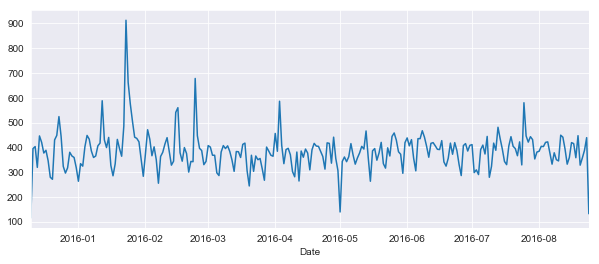

In [44]:
# Counting by date at latitude
plt.figure(figsize=(10,4))
df.groupby('Date').count()['twp'].plot(kind='line')
#plt.tight_layout()

In [37]:
# Tidying up Month Names
# remap the month
# Make the map to show names
monthmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['MonthName'] = df['Month'].map(monthmap)

No data for Oct, Nov, Dec and January

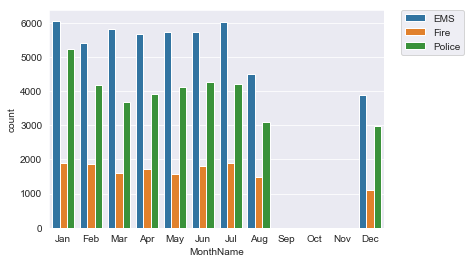

In [40]:
sns.countplot(x=df['MonthName'],hue=df['service'], order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # move legend outside plot

Remapping the order to show the gap more clearly.
Police get many more calls in February than the summer, which is counterintuitive.

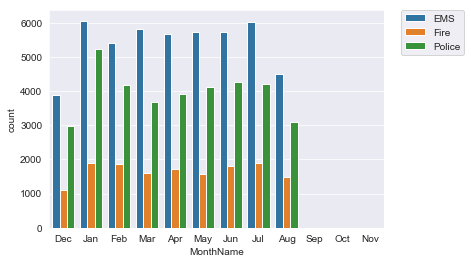

In [42]:
sns.countplot(x=df['MonthName'],hue=df['service'], order=['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # move legend outside plot

**Breaking out a timeseries view by service**

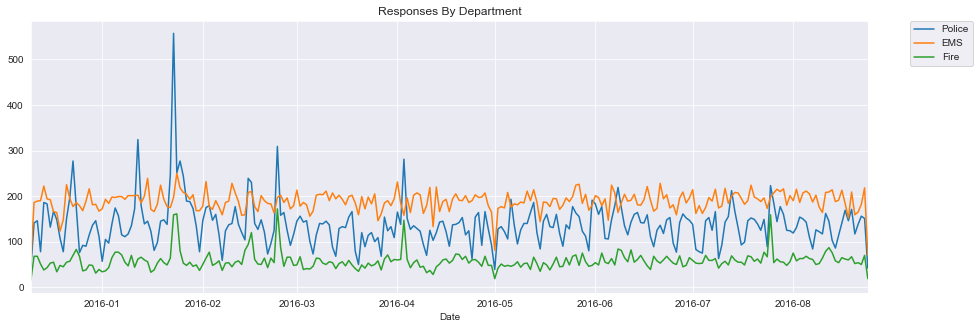

In [47]:
services=['Police','EMS','Fire']
for s in services:
    df[df['service']==s].groupby('Date').count()['twp'].plot(label=s,figsize=(15,5))
    plt.title(f'Responses By Department')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Adding Heatmaps**

In [50]:
# using .unstack() to pivot the data into a matrix
df.groupby(by=['Day of Week','Hour']).count()['service'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [52]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['service'].unstack()

**Easier to see the high counts are working hours on all weekdays, with a slight drop on Sunday**

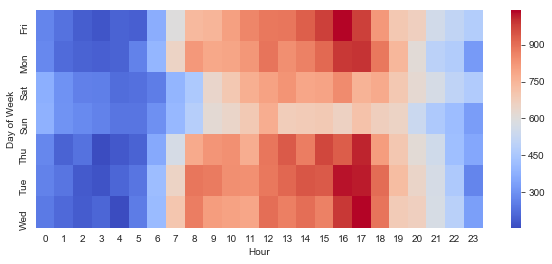

In [54]:
plt.figure(figsize=(10,4))
sns.heatmap(dayHour,cmap='coolwarm')

**Adding a clustermap view for specific time/day correlations**

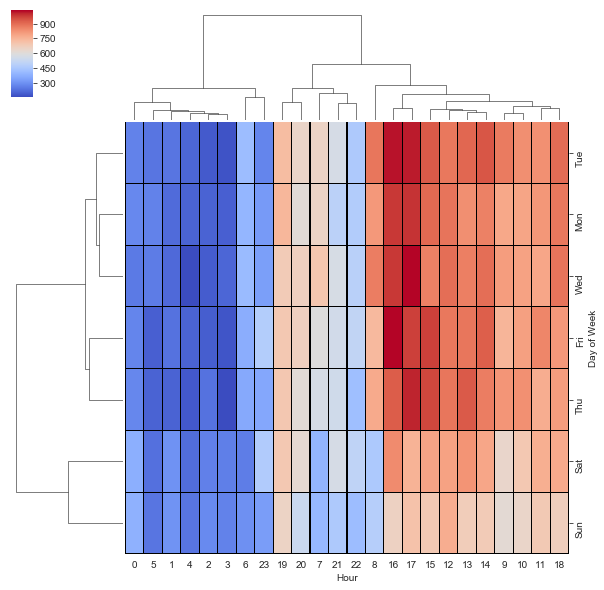

In [55]:
sns.clustermap(dayHour,linecolor='black',linewidths=.10,cmap='coolwarm')

**How about by Month?**

In [56]:
monthHour = df.groupby(by=['Day of Week','Month']).count()['service'].unstack()

**Saturdays in January are weirdly active, Sundays in December the least active**

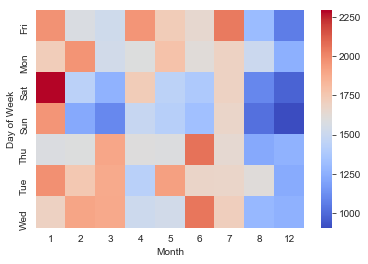

In [57]:
sns.heatmap(monthHour,cmap='coolwarm')

**This is a little easier to see with the clustermap**

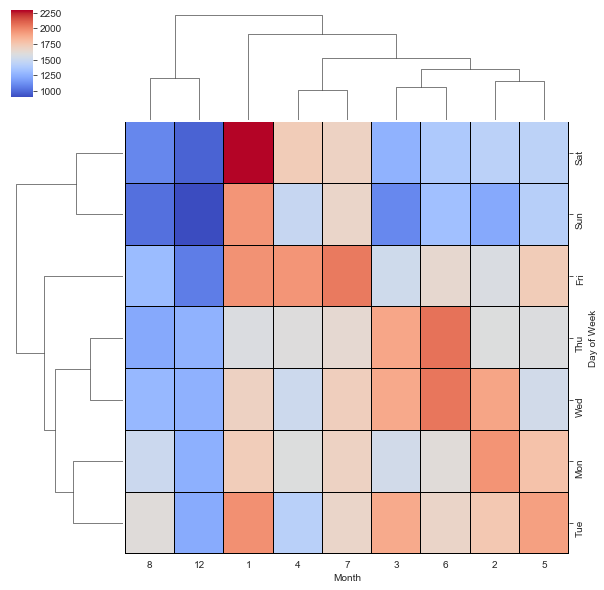

In [58]:
sns.clustermap(monthHour,linecolor='black',linewidths=.10,cmap='coolwarm')